In [1]:
import os
import time
import json
import numpy as np
import pandas as pd
import threading

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from mpl_finance import candlestick_ohlc
import mpl_finance as mplf

import tkinter as tk
from tkinter import *
from tkinter import ttk




C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
file_names = os.listdir("D:\\market_train\\dataset\\nifty 1m")


#or file in file_names[0:1]:\
file_name = "ASIANPAINT_with_indicators_.csv"
csv_data = pd.read_csv("D:\\market_train\\dataset\\data creation\\"+file_name)
csv_data['date'] = pd.to_datetime(csv_data['date'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13772\883750720.py:6: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv("D:\\market_train\\dataset\\data creation\\"+file_name)


In [3]:
class Write_to_csv:
    
    def __init__(self) -> None:
        global counter
        self.current_pattern = None
        self.start_index = None
        self.shoulder1_index = None
        self.shoulder2_index = None
        self.neckline_index = None
        self.neckline1_index = None
        self.neckline2_index = None
        self.head_index = None
        self.top1_index = None
        self.top2_index = None
        self.target_index = None
        self.price_counter = 0
        self.changes = None
        self.save_data_thread = threading.Thread(target=self.save_data_to_csv)
        self.save_data_thread.start()
        self.start_time = time.time()
        self.current_state = {}
        with open('current_status.json','r') as json_status_file:
            self.current_state = json.load(json_status_file)
        counter = self.current_state['completed index']
        self.previous_counter = counter

        process_graph.update_plot(0)
        Label_changes.show_counter()




    def save_data_to_csv(self):
        while True:
            time.sleep(60)
            self.current_state['completed index'] = counter
            self.current_state['total time spent'] += time.time() - self.start_time
            self.current_state['total completed index'] += counter - self.previous_counter
            self.start_time = time.time()
            self.previous_counter = counter


            with open('current_status.json','w') as json_status_file:
                json.dump(self.current_state,json_status_file)

            if self.changes != None:
                csv_data.to_csv('D:\\market_train\\dataset\\data creation\\'+file_name, index=False )
                print("saved changes")
                self.changes = None
            else:
                print("no changes saved")
            

    def write_double_top_to_csv(self,value1,value2,value3,value4,value5):
        if self.current_pattern == "DOUBLE TOP":
            self.changes = 1
            self.start_index = value1 + counter
            self.top1_index = value2 + counter
            self.neckline_index = value3 + counter
            self.top2_index = value4 + counter
            self.target_index = value5 + counter


            for index in range(self.start_index,self.target_index+1,1):
                csv_data.at[index,'patternName_doubletop'] = 'DT'

            csv_data.at[self.start_index,'patternFeatures_doubletop'] = 'START'
            csv_data.at[self.top1_index,'patternFeatures_doubletop'] = 'TOP 1'
            csv_data.at[self.neckline_index,'patternFeatures_doubletop'] = 'NECKLINE'
            csv_data.at[self.top2_index,'patternFeatures_doubletop'] = 'TOP 2'
            csv_data.at[self.target_index,'patternFeatures_doubletop'] = 'TARGET'

            self.current_state['total pattern identified'] += 1
            self.current_state['total double top'] += 1

            #csv_data.to_csv('D:\\market_train\\dataset\\temp_data_creation_updated.csv')


        print(self.start_index,
              self.top1_index,
              self.neckline_index,
              self.top2_index,
              self.target_index,
              self.current_pattern)
        
    def write_head_and_shoulders_to_csv(self,value1,value2,value3,value4,value5,value6,value7):
        if self.current_pattern == "HEAD AND SHOULDERS":
            self.changes = 1
            self.start_index = value1 + counter
            self.shoulder1_index = value2 + counter
            self.neckline1_index = value3 + counter
            self.head_index = value4 + counter
            self.neckline2_index = value5 + counter
            self.shoulder2_index = value6 + counter
            self.target_index = value7 + counter


            for index in range(self.start_index,self.target_index+1,1):
                csv_data.at[index,'patternName_headandshoulders'] = 'H&S'

            csv_data.at[self.start_index,'patternFeatures_headandshoulders'] = 'START'
            csv_data.at[self.shoulder1_index,'patternFeatures_headandshoulders'] = 'SHOULDER 1'
            csv_data.at[self.neckline1_index,'patternFeatures_headandshoulders'] = 'NECKLINE 1'
            csv_data.at[self.head_index,'patternFeatures_headandshoulders'] = 'HEAD'
            csv_data.at[self.neckline2_index,'patternFeatures_headandshoulders'] = 'NECKLINE 2'
            csv_data.at[self.shoulder2_index,'patternFeatures_headandshoulders'] = 'SHOULDER 2'
            csv_data.at[self.target_index,'patternFeatures_headandshoulders'] = 'TARGET'
            
            self.current_state['total pattern identified'] += 1
            self.current_state['total head and shoulders'] += 1

            #csv_data.to_csv('D:\\market_train\\dataset\\temp_data_creation_updated.csv')




            print(self.start_index,
                self.shoulder1_index,
                self.neckline1_index,
                self.head_index,
                self.neckline2_index,
                self.shoulder2_index,
                self.target_index,
                self.current_pattern)


class process_graph:

    def __init__(self) -> None:
        self.start_price = None
        self.shoulder1_price = None
        self.shoulder2_price = None
        self.neckline_price = None
        self.neckline1_price = None
        self.neckline2_price = None
        self.head_price = None
        self.top1_price = None
        self.top2_price = None
        self.target_price = None
        self.price_counter = 0

    def update_plot(self,counter_increment):
        global counter
        counter += counter_increment
        ax.clear()  

        stock_prices = csv_data[counter:counter+400]
        mplf.candlestick2_ohlc(ax, stock_prices['open'], stock_prices['high'], stock_prices['low'], stock_prices['close'],
                                width=0.7, colorup='g', colordown='r')
        canvas.draw()

    def reset(self):
        self.start_price = None
        self.shoulder1_price = None
        self.shoulder2_price = None
        self.neckline_price = None
        self.neckline1_price = None
        self.neckline2_price = None
        self.head_price = None
        self.top1_price = None
        self.top2_price = None
        self.target_price = None
        self.price_counter = 0

    def on_button_press(self,pattern):
        Write_to_csv.current_pattern = pattern
        if pattern == 'DOUBLE TOP':
            Label_changes.change_label_double_top(0)
        elif pattern == 'HEAD AND SHOULDERS':
            Label_changes.change_label_head_and_shoulder(0)
            


    def on_key(self,event):
        if event.key == 'right':
            self.update_plot(40)
            Label_changes.show_counter()
        if event.key == 'left':
            self.update_plot(-20)
            Label_changes.show_counter()


    def on_click(self,event):
        x = event.x
        y = event.y

        price_value = (x/4) - 25     
        price_value = int(price_value) 
        
        Label_changes.show_price(price_value)

        if Write_to_csv.current_pattern == 'DOUBLE TOP':
            self.update_double_top_prices(price_value)
            Label_changes.change_label_double_top(self.price_counter)
        elif Write_to_csv.current_pattern == 'HEAD AND SHOULDERS':
            self.update_head_and_shoulder_prices(price_value)
            Label_changes.change_label_head_and_shoulder(self.price_counter)
        


    
    def update_double_top_prices(self,price):

        self.price_counter += 1

        match self.price_counter:
            case 1:
                self.start_price = price
            case 2:
                self.top1_price = price
            case 3:
                self.neckline_price = price
            case 4:
                self.top2_price = price
            case 5:
                self.target_price = price

        if self.price_counter == 5:
            Write_to_csv.write_double_top_to_csv(self.start_price,
                                            self.top1_price,
                                            self.neckline_price,
                                            self.top2_price,
                                            self.target_price)
            self.reset()
            Label_changes.reset()

        #print(self.start_price,self.top1_price,self.neckline_price,self.top2_price,self.target_price,self.price_counter)

    def update_head_and_shoulder_prices(self,price):

        self.price_counter += 1

        match self.price_counter:
            case 1:
                self.start_price = price
            case 2:
                self.shoulder1_price = price
            case 3:
                self.neckline1_price = price
            case 4:
                self.head_price = price
            case 5:
                self.neckline2_price = price
            case 6:
                self.shoulder2_price = price
            case 7:
                self.target_price = price

        if self.price_counter == 7:
            Write_to_csv.write_head_and_shoulders_to_csv(self.start_price,
                                            self.shoulder1_price,
                                            self.neckline1_price,
                                            self.head_price,
                                            self.neckline2_price,
                                            self.shoulder2_price,
                                            self.target_price)
            self.reset()
            Label_changes.reset()
        #print(self.start_price, self.shoulder1_price,self.neckline1_price,self.head_price,self.neckline2_price,self.shoulder2_price,self.target_price,self.price_counter)


        


class Label_changes:
    def __init__(self) -> None:


        self.price_frame = tk.Frame(app)
        self.price_frame.grid(row=1,column=1,padx=10,pady=10)

        self.price_value_label = ttk.Label(self.price_frame,text=0)
        self.price_value_label.grid(row=0,column=0,padx=10,pady=10)

        self.current_counter_label = ttk.Label(self.price_frame,text=0)
        self.current_counter_label.grid(row=1,column=0,padx=10,pady=10)

        self.clicked_prices_status_frame = tk.Frame(app)
        self.clicked_prices_status_frame.grid(row=1,column=0,padx=10,pady=10)



        self.start = ttk.Label(self.clicked_prices_status_frame,text='START',background='red',foreground='white')
        self.top1 = ttk.Label(self.clicked_prices_status_frame,text='TOP 1',background='red',foreground='white')
        self.neckline = ttk.Label(self.clicked_prices_status_frame,text='NECKLINE',background='red',foreground='white')
        self.top2 = ttk.Label(self.clicked_prices_status_frame,text='TOP 2',background='red',foreground='white')
        self.shoulder1 = ttk.Label(self.clicked_prices_status_frame,text='SHOULDER 1',background='red',foreground='white')
        self.neckline1 = ttk.Label(self.clicked_prices_status_frame,text='NECKLINE 1',background='red',foreground='white')
        self.head = ttk.Label(self.clicked_prices_status_frame,text='HEAD',background='red',foreground='white')
        self.neckline2 = ttk.Label(self.clicked_prices_status_frame,text='NECKLINE 2',background='red',foreground='white')
        self.shoulder2 = ttk.Label(self.clicked_prices_status_frame,text='SHOULDER 2',background='red',foreground='white')
        self.target = ttk.Label(self.clicked_prices_status_frame,text='TARGET',background='red',foreground='white')







    def reset(self):
        self.price_counter = 0

        try:
            self.start.config(background='red')
            self.start.grid_forget()
        except:pass
        try:
            self.shoulder1.config(background='red')
            self.shoulder1.grid_forget() 
        except:pass
        try:
            self.shoulder2.config(background='red')
            self.shoulder2.grid_forget() 
        except:pass
        try:
            self.neckline.config(background='red')
            self.neckline.grid_forget()
        except:pass
        try:
            self.neckline1.config(background='red')
            self.neckline1.grid_forget()
        except:pass
        try:
            self.neckline2.config(background='red')
            self.neckline2.grid_forget()
        except:pass
        try:
            self.head.config(background='red')
            self.head.grid_forget()
        except:pass
        try:
            self.top1.config(background='red')
            self.top1.grid_forget()
        except:pass
        try:
            self.top2.config(background='red')
            self.top2.grid_forget()
        except:pass
        try:
            self.target.config(background='red')
            self.target.grid_forget()
        except:pass



    def change_label_double_top(self,value):
        
        if value == 0:
            self.reset()
            process_graph.reset()
            
            self.start.grid(row=0,column=0,padx=10,pady=10)
            self.top1.grid(row=0,column=1,padx=10,pady=10)
            self.neckline.grid(row=0,column=2,padx=10,pady=10)
            self.top2.grid(row=0,column=3,padx=10,pady=10)
            self.target.grid(row=0,column=4,padx=10,pady=10)
            

        match value:
            case 1:
                self.start.config(background='green')
            case 2:
                self.top1.config(background='green')
            case 3:
                self.neckline.config(background='green')
            case 4:
                self.top2.config(background='green')
            case 5:
                self.target.config(background='green')

    def change_label_head_and_shoulder(self,value):

        if value == 0:
            self.reset()
            process_graph.reset()

            self.start.grid(row=0,column=0,padx=10,pady=10)
            self.shoulder1.grid(row=0,column=1,padx=10,pady=10)
            self.neckline1.grid(row=0,column=2,padx=10,pady=10)
            self.head.grid(row=0,column=3,padx=10,pady=10)
            self.neckline2.grid(row=0,column=4,padx=10,pady=10)
            self.shoulder2.grid(row=0,column=5,padx=10,pady=10)
            self.target.grid(row=0,column=6,padx=10,pady=10)
            

        match value:
            case 1:
                self.start.config(background='green')
            case 2:
                self.shoulder1.config(background='green')
            case 3:
                self.neckline1.config(background='green')
            case 4:
                self.head.config(background='green')
            case 5:
                self.neckline2.config(background='green')
            case 6:
                self.shoulder2.config(background='green')
            case 7:
                self.target.config(background='green')


    def show_price(self,price_value):
        
        self.price_value_label.config(text=price_value,font=('Helvetica bold', 20))
    
    def show_counter(self):
        self.current_counter_label.config(text=counter,font=('Helvetica bold', 20))




    def temp():
        pass


counter = 0
start_time = time.time()

app = tk.Tk()
app.title("plot")



fig = Figure(figsize=(18, 8), dpi=100)
fig.subplots_adjust(left=0.01, right=0.99, top=0.95, bottom=0.05)  
ax = fig.add_subplot(111)

canvas = FigureCanvasTkAgg(fig, master=app)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(row=0,column=0,padx=10,pady=10)

bottons_frame = tk.Frame(app)
bottons_frame.grid(row=0,column=1,padx=10,pady=10)

Double_top_button = tk.Button(bottons_frame, text="Double top", command=lambda: process_graph.on_button_press('DOUBLE TOP'),height=20,width=10)
Double_top_button.grid(row=0,column=1,padx=10,pady=10)

Head_and_shoulders_button = tk.Button(bottons_frame, text="Head and shoulders", command=lambda: process_graph.on_button_press('HEAD AND SHOULDERS'),height=20,width=10)
Head_and_shoulders_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

#process_graph.update_plot(0)

Label_changes = Label_changes()
process_graph = process_graph()
Write_to_csv = Write_to_csv()


canvas.mpl_connect('key_press_event',process_graph.on_key)
canvas_widget.bind("<Button-1>", process_graph.on_click)

app.mainloop()

70362 70367 70372 70375 70432 DOUBLE TOP
71636 71646 71681 71715 71739 DOUBLE TOP
saved changes
72920 72926 72930 72939 72948 DOUBLE TOP
74465 74474 74482 74486 74493 74498 74567 HEAD AND SHOULDERS
saved changes
74948 74958 74964 74968 74982 DOUBLE TOP
76602 76621 76639 76645 76675 DOUBLE TOP
78995 79008 79012 79017 79031 DOUBLE TOP
saved changes
81838 81841 81844 81851 81857 81866 81889 HEAD AND SHOULDERS
82384 82395 82413 82436 82453 DOUBLE TOP
saved changes
83063 83072 83083 83086 83099 83108 83121 HEAD AND SHOULDERS
83579 83586 83589 83595 83615 DOUBLE TOP
84464 84494 84505 84515 84539 DOUBLE TOP
saved changes
85515 85520 85526 85549 85579 85586 85691 HEAD AND SHOULDERS
87438 87455 87460 87467 87476 87483 87552 HEAD AND SHOULDERS
88478 88506 88517 88527 88539 88548 88603 HEAD AND SHOULDERS
saved changes
89249 89294 89346 89417 89503 DOUBLE TOP
89560 89573 89584 89593 89691 DOUBLE TOP
90697 90704 90717 90743 90757 90766 90776 HEAD AND SHOULDERS
saved changes
95196 95208 95225 95244 

saved changes


In [2]:
#file_names = os.listdir("D:\\market_train\\dataset\\nifty 1m")


#or file in file_names[0:1]:\
file_name = "ARNC.csv"
csv_data = pd.read_csv("D:\\market_train\\dataset\\data creation\\"+file_name)
csv_data['date'] = pd.to_datetime(csv_data['date'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16108\306503543.py:6: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv("D:\\market_train\\dataset\\data creation\\"+file_name)


In [42]:
x_data = []
y_data = []

counter = 0
close = csv_data['open']

while True:
    if csv_data['patternName_doubletop'][counter] == 'DT':
        x_temp = []
        print(csv_data['patternName_doubletop'][counter])
        for i in range(counter,len(close)):
            if csv_data['patternName_doubletop'][i] == 'DT':
                x_temp.append(close[i])
            else:
                counter = i
                break
        x_data.append(x_temp)
    counter += 1
    if counter >= len(close):
        break
        



DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT
DT


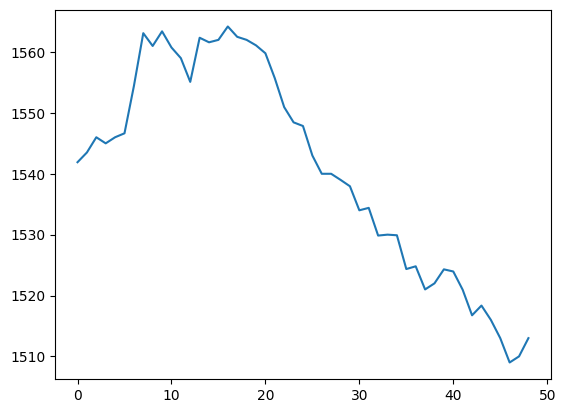

In [44]:
len(x_data)

165